##### Chapter 3 – Overfitting and Underfitting

Here we synthetically generate a dataset to see the effect of **overfitting** and **underfitting**.

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [4]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

Import all the necessary libraries.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

##### Helper function:

This function is to save the figures.

In [6]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

##### Helper function:

This function is generate the target variable, $Y = 0.1X^3 + 2X^2 + 7X +4$

In [13]:
def func(X):
    return 0.1 * X ** 3 + 2 * X ** 2 + 7 * X + 4

##### Helper function:

This function generate the dataset with $X$ and $Y$ using the `func()` function.

In [14]:
def generate_dataset(X_min, X_max, size):
    X = rng.uniform(X_min, X_max, size)
    y = np.array([func(Xi) for Xi in X]) + 10 * rng.randn(size) # Noise added
    return X, y

##### Helper function:

This function returns pipeline with PolynomialFeatures(degree), StandardScaler and LinearRegression.

In [15]:
def polynomial_regression(degree=1):
    return make_pipeline(PolynomialFeatures(degree),
                         StandardScaler(),
                         LinearRegression())

Define the parameters.

In [17]:
rng = np.random.RandomState(seed=42)
X_min = -15
X_max = 2
size = 20

Now generate the true value of $X$ and $Y$.

In [18]:
X_true = np.arange(X_min, X_max, step=0.1)
y_true = np.array([func(xi) for xi in X_true])

Generate the dataset and split into training and test set.

In [19]:
X, y = generate_dataset(X_min, X_max, size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Fit the polynomial regression model and predict the target for `X_true`.

In [20]:
degrees = (1, 3, 5, 8, 10, 12, 15)

y_true_pred = {}
train_error = {}
gen_error = {}

for degree in degrees:
    model = polynomial_regression(degree)
    model.fit(X_train.reshape(-1, 1), y_train)
    
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))
    y_true_pred[degree] = model.predict(X_true.reshape(-1, 1))
    
    train_error[degree] = mean_squared_error(y_train, y_train_pred)
    gen_error[degree] = mean_squared_error(y_test, y_test_pred)

Plot the regression model for varying degree of complexity.

Saving figure poly regression with varying degree showing overfitting and underfitting


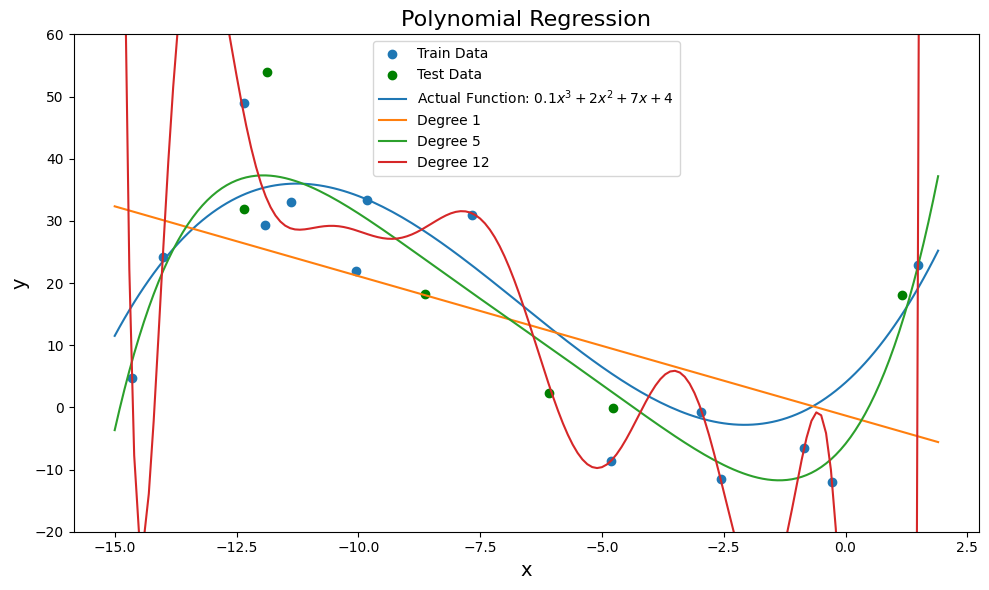

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, color='g', label="Test Data")
plt.plot(X_true, y_true, label='Actual Function: $0.1x^3 + 2x^2 + 7x + 4$')
for degree in (1, 5, 12):
    plt.plot(X_true, y_true_pred[degree], label=f"Degree {degree}")
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.title("Polynomial Regression", fontsize=16)
plt.ylim(-20, 60)
save_fig('poly regression with varying degree showing overfitting and underfitting')
plt.show()

Simple linear regression (with degree = 1) doesn't fit well to the data. This is **underfitting**. Polynomial regression with degree = 12 learns the noise of the data rather than finding the underlying pattern. This is **overfitting**. Polynomial regression with degree = 5 is the best fit among these 3 models.

Now we generate a similar dataset with 10X size, split into training set and test set and train the simple model (degree = 1) and complex model (degree = 12) to see what effect it has on overfitting and underfitting.

In [24]:
large_size = 200
X_large, y_large = generate_dataset(X_min, X_max, large_size)

X_large_true = np.arange(X_min, X_max, step=0.1)
y_large_true = np.array([func(Xi) for Xi in X_large_true])

X_large_train, X_large_test, y_large_train, y_large_test = train_test_split(X_large, y_large, test_size=0.3, random_state=42)

Saving figure effect of increase data size on overfitting and underfitting


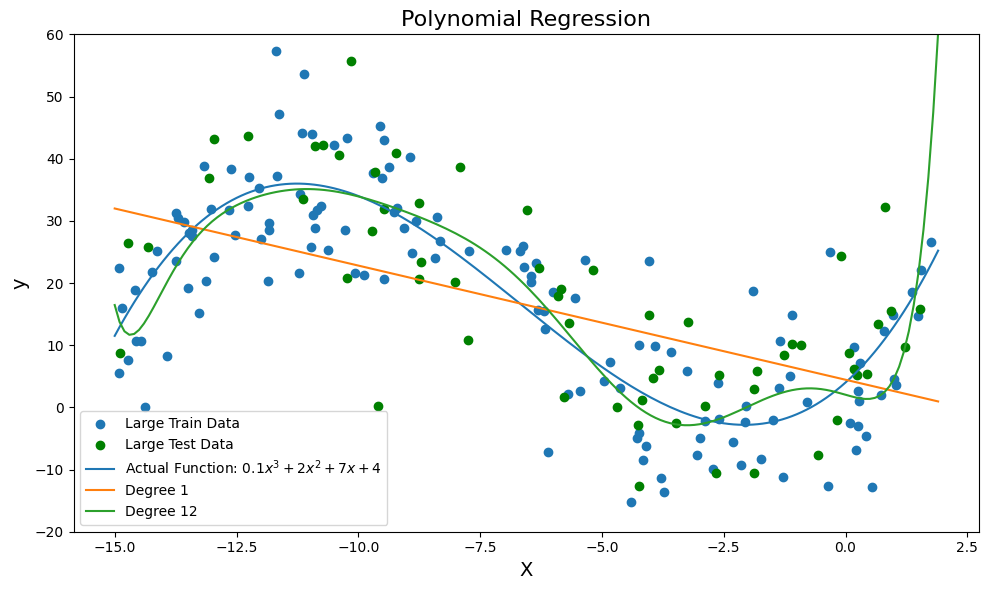

In [25]:
degrees = (1, 12)

y_large_true_pred = {}
large_train_error = {}
large_gen_error = {}

for degree in degrees:
    model = polynomial_regression(degree)
    model.fit(X_large_train.reshape(-1, 1), y_large_train)
    
    y_large_train_pred = model.predict(X_large_train.reshape(-1, 1))
    y_large_test_pred = model.predict(X_large_test.reshape(-1, 1))
    y_large_true_pred[degree] = model.predict(X_large_true.reshape(-1, 1))
    
    large_train_error[degree] = mean_squared_error(y_large_train, y_large_train_pred)
    large_gen_error[degree] = mean_squared_error(y_large_test, y_large_test_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X_large_train, y_large_train, label="Large Train Data")
plt.scatter(X_large_test, y_large_test, color='g', label="Large Test Data")
plt.plot(X_large_true, y_large_true, label='Actual Function: $0.1x^3 + 2x^2 + 7x + 4$')
for degree in (1, 12):
    plt.plot(X_large_true, y_large_true_pred[degree], label=f"Degree {degree}")
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.title("Polynomial Regression", fontsize=16)
plt.ylim(-20, 60)
save_fig('effect of increase data size on overfitting and underfitting')
plt.show()

While the underfitted model (degree = 1) was not affected from increasing the dataset size, the overfitted model (degree = 12) is definitely better fitted now. Because, with more data it was able to learn the underlying pattern better and was able differentiate the data from noise.

Now we compute the training and testing (generalization error) on training and test split respectively for different degree complexity.

In [28]:
degrees = range(1, 13)

mse_train = []
mse_gen = []

for degree in degrees:
    model = polynomial_regression(degree)
    model.fit(X_large_train.reshape(-1, 1), y_large_train)
    
    y_large_train_pred = model.predict(X_large_train.reshape(-1, 1))
    y_large_test_pred = model.predict(X_large_test.reshape(-1, 1))
    y_large_true_pred[degree] = model.predict(X_large_true.reshape(-1, 1))

    train_error = mean_squared_error(y_large_train, y_large_train_pred)
    gen_error = mean_squared_error(y_large_test, y_large_test_pred)
    
    mse_train.append(train_error)
    mse_gen.append(gen_error)

Now we plot the training error and generalization (test) error.

Saving figure training and generalization error for varying degree complexity


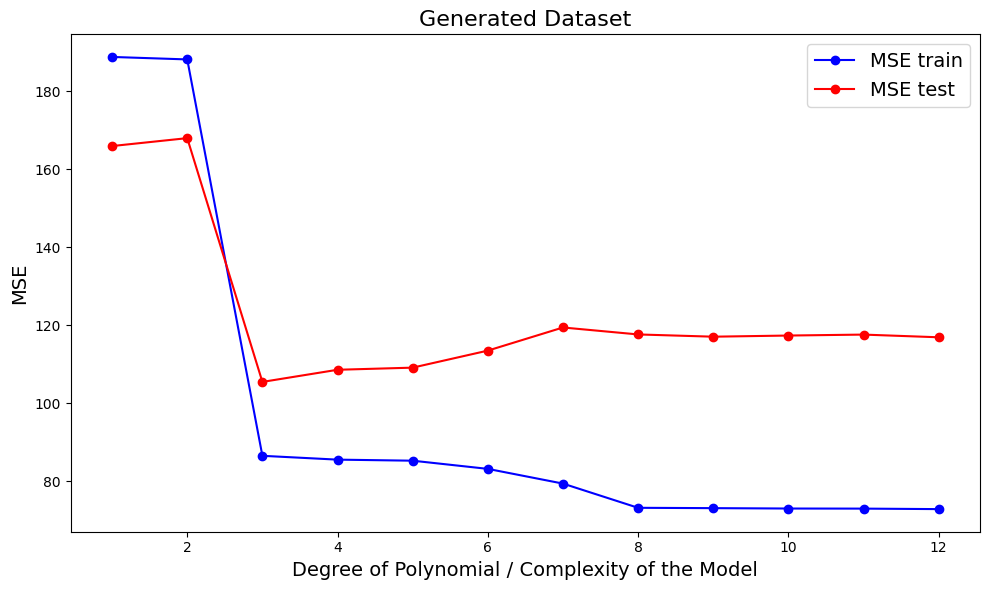

In [31]:
plt.figure(figsize=(10, 6))

plt.plot(degrees, mse_train, 'bo-', label='MSE train')
plt.plot(degrees, mse_gen, 'ro-', label='MSE test')
plt.xlabel("Degree of Polynomial / Complexity of the Model", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.title("Generated Dataset", fontsize=16)

save_fig('training and generalization error for varying degree complexity')
# plt.ylim(0, 100)

At degree = 3, the model fits best since it has the lowest generalization error.